In [7]:
import pandas as pd
import seaborn as sns

df=sns.load_dataset('titanic')

pd.set_option('display.max_columns',15)

rdf=df.drop(['deck','embark_town'],axis=1)

rdf=rdf.dropna(subset=['age'],how='any',axis=0)

most_freq=rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq,inplace=True)

ndf=rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
onehot_sex=pd.get_dummies(ndf['sex'])
ndf=pd.concat([ndf,onehot_sex],axis=1)

onehot_embarked=pd.get_dummies(ndf['embarked'],prefix='town')
ndf=pd.concat([ndf,onehot_embarked],axis=1)

ndf.drop(['sex','embarked'],axis=1,inplace=True)

x=ndf[['pclass','age','sibsp','parch','female','male',
      'town_C','town_Q','town_S']]
y=ndf['survived']

from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.3,random_state=10)

print('train data 개수: ',x_train.shape)
print('test data 개수: ',x_test.shape)

from sklearn import svm

svm_model=svm.SVC(kernel='rbf')

svm_model.fit(x_train,y_train)

y_hat=svm_model.predict(x_test)

print(y_hat[0:10])
print(y_test.values[0:10])

from sklearn import metrics
cvm_matrix=metrics.confusion_matrix(y_test,y_hat)
print(cvm_matrix)
print('\n')

svm_report=metrics.classification_report(y_test,y_hat)
print(svm_report)

train data 개수:  (499, 9)
test data 개수:  (215, 9)
[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



C:\Users\60415\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
import pandas as pd
import numpy as np

uci_path='https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df=pd.read_csv(uci_path,header=None)

df.columns=['id','clump','cell_size','cell_shape','adhension','epithlial',
           'bare_nuclei','chromatin','normal_nucleoli','mitoses','class']

pd.set_option('display.max_columns',15)

print(df.head())
print('\n')

print(df.info())
print('\n')

print(df.describe())

print(df['bare_nuclei'].unique())
print('\n')

df['bare_nuclei'].replace('?',np.nan,inplace=True)
df.dropna(subset=['bare_nuclei'],axis=0,inplace=True)
df['bare_nuclei']=df['bare_nuclei'].astype('int')

print(df.describe())

x=df[['clump','cell_size','cell_shape','adhension','epithlial',
     'bare_nuclei','chromatin','normal_nucleoli','mitoses']]
y=df['class']

from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.3,random_state=10)

print('train data 개수: ',x_train.shape)
print('test data 개수: ',x_test.shape)

from sklearn import tree

tree_model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

tree_model.fit(x_train,y_train)

y_hat=tree_model.predict(x_test)
print(y_hat[0:10])
print(y_test.values[0:10])

from sklearn import metrics
tree_matrix=metrics.confusion_matrix(y_test,y_hat)
print(tree_matrix)
print('\n')

tree_report=metrics.classification_report(y_test,y_hat)
print(tree_report)

        id  clump  cell_size  cell_shape  adhension  epithlial bare_nuclei  \
0  1000025      5          1           1          1          2           1   
1  1002945      5          4           4          5          7          10   
2  1015425      3          1           1          1          2           2   
3  1016277      6          8           8          1          3           4   
4  1017023      4          1           1          3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                 699 non-null int64
clump              699 non-null int64
cell_size          699 non-null int64
cell_shape         699

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None


          Channel      Region          Fresh          Milk    

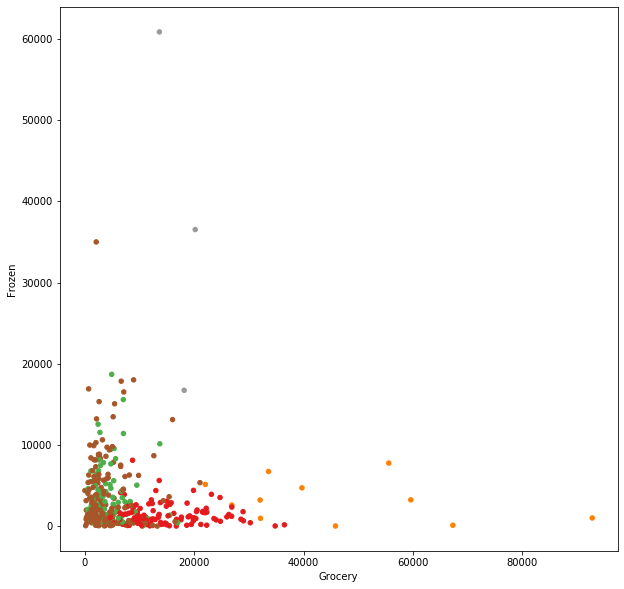

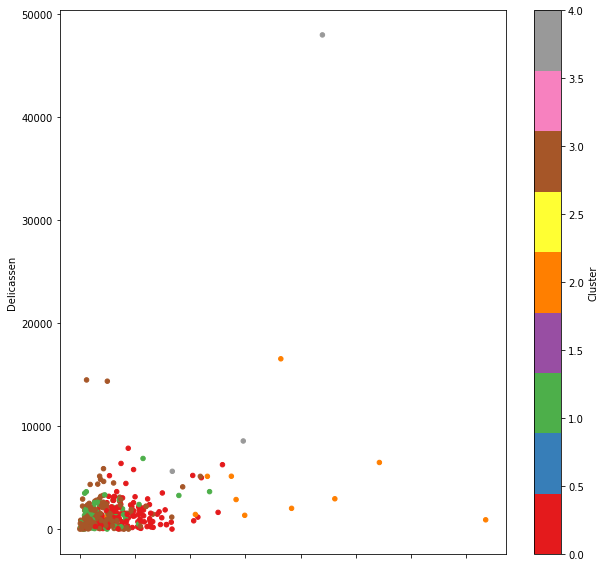

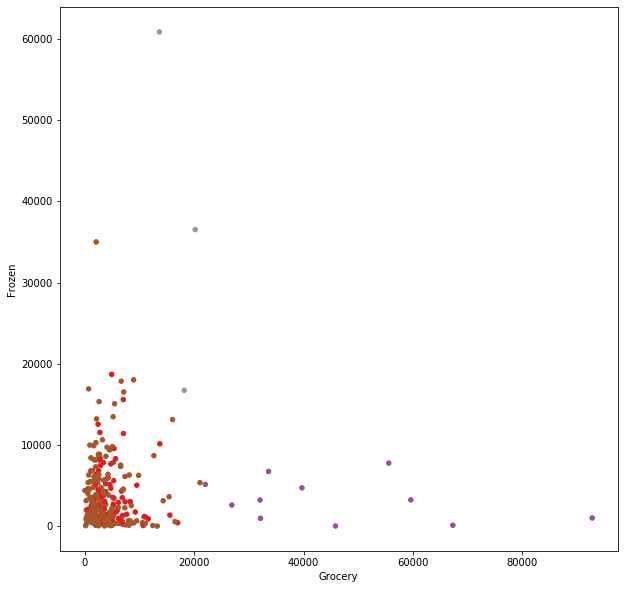

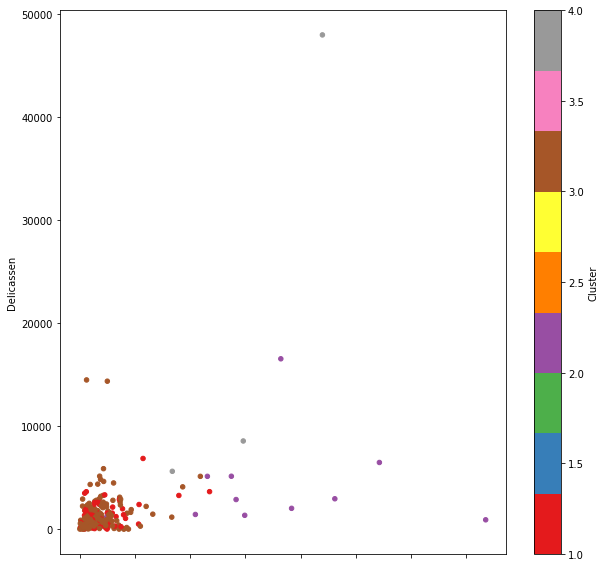

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path='https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df=pd.read_csv(uci_path,header=0)

print(df.head())
print('\n')

print(df.info())
print('\n')

print(df.describe())

x=df.iloc[:,:]
print(x[:5])
print('\n')

from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

print(x[:5])

from sklearn import cluster

kmeans=cluster.KMeans(init='k-means++',n_clusters=5,n_init=10)

kmeans.fit(x)

cluster_label=kmeans.labels_
print(cluster_label)
print('\n')

df['Cluster']=cluster_label
print(df.head())

df.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',
       colorbar=False,figsize=(10,10))
df.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',
       colorbar=True,figsize=(10,10))
plt.show()
plt.close()

mask=(df['Cluster']==0|(df['Cluster']==4))
ndf=df[~mask]

ndf.plot(kind='scatter',x='Grocery',y='Frozen',c='Cluster',cmap='Set1',
       colorbar=False,figsize=(10,10))
ndf.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',
       colorbar=True,figsize=(10,10))
plt.show()
plt.close()

In [45]:
import pandas as pd
import folium

file_path='./2016_middle_shcool_graduates_report.xlsx'
df=pd.read_excel(file_path,header=0)

pd.set_option('display.width',None)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',10)
pd.set_option('display.max_colwidth',20)
pd.set_option('display.unicode.east_asian_width',True)

print(df.columns.values)

print(df.head())
print('\n')

print(df.info())
print('\n')

print(df.describe())

mschool_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                      zoom_start=12)

for name,lat,lng in zip(df.학교명,df.위도,df.경도):
    folium.CircleMarker([lat,lng],radius=5,color='brown',
                       fill=True,fill_color='coral',fill_opacity=0.7,
                       popup=name
                       ).add_to(mschool_map)

mschool_map.save('./seoul_mschool_location.html')

from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
onehot_encoder=preprocessing.OneHotEncoder()

onehot_location=label_encoder.fit_transform(df['지역'])
onehot_code=label_encoder.fit_transform(df['코드'])
onehot_type=label_encoder.fit_transform(df['유형'])
onehot_day=label_encoder.fit_transform(df['주야'])

df['location']=onehot_location
df['code']=onehot_code
df['type']=onehot_type
df['day']=onehot_day

print(df.head())

from sklearn import cluster

columns_list=[9,10,13]
x=df.iloc[:,columns_list]
print(x[:5])
print('\n')

x=preprocessing.StandardScaler().fit(x).transform(x)

dbm=cluster.DBSCAN(eps=0.2,min_samples=5)

dbm.fit(x)

cluster_label=dbm.labels_
print(cluster_label)
print('\n')

df['Cluster']=cluster_label
print(df.head())

grouped_cols=[0,1,3]+columns_list
grouped=df.groupby('Cluster')
for key,group in grouped:
    print('* key:',key)
    print('* number:',len(group))
    print(group.iloc[:,grouped_cols].head())
    print('\n')
    
colors={-1:'gray',0:'coral',1:'blue',2:'green',3:'red',4:'purple',
       5:'orange',6:'brown',7:'brick',8:'yellow',9:'magenta',10:'cyan',11:'pink'}

cluster_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                      zoom_start=12)

for name,lat,lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
    folium.CircleMarker([lat, lng], radius=5, color=colors[clus],
                       fill=True, fill_color=colors[clus], fill_opacity=0.7,
                       popup=name
                       ).add_to(cluster_map)

cluster_map.save('./seoul_mschool_cluster.html')

columns_list2=[9,10,11,12]
x2=df.iloc[:,columns_list2]
print(x2[:5])
print('\n')

x2=preprocessing.StandardScaler().fit(x).transform(x)
dbm2=cluster.DBSCAN(eps=0.2,min_samples=5)
dbm2.fit(x)
df['Cluster2']=dbm2.labels_

grouped2_cols=[0,1,3]+columns_list2
grouped2=df.groupby('Cluster2')
for key,group in grouped2:
    print('* key:',key)
    print('* number:',len(group))
    print(group.iloc[:,grouped2_cols].head())
    print('\n')
    
cluster2_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                      zoom_start=12)

for name,lat,lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
    folium.CircleMarker([lat, lng], radius=5, color=colors[clus],
                       fill=True, fill_color=colors[clus], fill_opacity=0.7,
                       popup=name
                       ).add_to(cluster2_map)

cluster2_map.save('./seoul_mschool_cluster2.html')

columns_list3=[9,10]
x3=df.iloc[:,columns_list3]
print(x3[:5])
print('\n')

x3=preprocessing.StandardScaler().fit(x).transform(x)
dbm3=cluster.DBSCAN(eps=0.2,min_samples=5)
dbm3.fit(x)
df['Cluster3']=dbm3.labels_

grouped3_cols=[0,1,3]+columns_list3
grouped3=df.groupby('Cluster3')
for key,group in grouped3:
    print('* key:',key)
    print('* number:',len(group))
    print(group.iloc[:,grouped3_cols].head())
    print('\n')
    
cluster3_map=folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',
                      zoom_start=12)

for name,lat,lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):
    folium.CircleMarker([lat, lng], radius=5, color=colors[clus],
                       fill=True, fill_color=colors[clus], fill_opacity=0.7,
                       popup=name
                       ).add_to(cluster2_map)

cluster3_map.save('./seoul_mschool_cluster3.html')

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']
   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

  기타진학  취업   미상       위도        경도  
0    0.004     0  0.000  37.594942  127.038909  
1    0.031     0  0.000  37.577473  127.003857  
2    0.009     0  0.003  37.491637  127.071744  
3    0.019     0  0.000  37.480439  127.062201  
4    0.010     0  0.000  37.510750  127.008900  

[5 rows x 21 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
Unnamed: 0    415 non-null int64
지역            415 no

   특성화고  과학고  외고_국제고  예고_체고
0     0.148   0.018        0.007      0.000
1     0.199   0.000        0.035      0.008
2     0.047   0.009        0.012      0.003
3     0.097   0.013        0.013      0.019
4     0.017   0.007        0.010      0.005


* key: -1
* number: 234
   Unnamed: 0    지역  코드  특성화고  과학고  외고_국제고  예고_체고
0           0  성북구     3     0.148   0.018        0.007      0.000
2           2  강남구     3     0.047   0.009        0.012      0.003
3           3  강남구     3     0.097   0.013        0.013      0.019
6           6  강남구     3     0.015   0.015        0.036      0.005
7           7  강남구     3     0.000   0.032        0.005      0.000


* key: 0
* number: 70
    Unnamed: 0    지역  코드  특성화고  과학고  외고_국제고  예고_체고
1            1  종로구     3     0.199     0.0        0.035      0.008
13          13  서초구     3     0.032     0.0        0.022      0.000
23          23  강남구     3     0.025     0.0        0.040      0.019
28          28  서초구     3     0.040     0.0        0.015      